In [190]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D
from sklearn.preprocessing import PolynomialFeatures

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [191]:
#importando libreria pandas alias pd
import pandas as pd
#labelEncoder sirve para convertir datos categoricos a numericos para poder hacer mejores calculos
from sklearn.preprocessing import LabelEncoder
#datatime sirve para poder trabajar con fechas
from datetime import datetime

In [192]:
#conectamos con google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [193]:
#cargamos el dataset nota:"skiprows=1" omite l aprimera fila por el encabezado
data=pd.read_csv('/content/drive/MyDrive/laboratorios_IA/lab_4/lab_1/fords.csv',delimiter=',',skiprows=0)

In [194]:
data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


mostramos la informacion

In [195]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


vamos a ordenar las columnas para poder resolver mejor las prdicciones

In [196]:
#lista con el nuevo orden de la columnas
nuevo_orden_columnas=['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize', 'price']

#reordena las columnas segun el nuevo orden
data=data[nuevo_orden_columnas]

In [197]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   transmission  17966 non-null  object 
 3   mileage       17966 non-null  int64  
 4   fuelType      17966 non-null  object 
 5   tax           17966 non-null  int64  
 6   mpg           17966 non-null  float64
 7   engineSize    17966 non-null  float64
 8   price         17966 non-null  int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [198]:
# variables categoricas
columnas_categoricas=data.select_dtypes(include=['object']).columns

# variables fechas
columnas_fechas=data.select_dtypes(include=['datetime64']).columns

In [199]:
# conversion de frases o palabras a numeros para su processamiento
for columna in columnas_categoricas:
  le=LabelEncoder()
  data[columna]=le.fit_transform(data[columna])

In [200]:
# fechas a numeros
for columna in columnas_fechas:
  data[columna] = pd.to_numeric(data[columna].map(datetime.timestamp))

In [201]:
# mostramos los objetos convertidos
print(data)

       model  year  transmission  mileage  fuelType  tax   mpg  engineSize  \
0          5  2017             0    15944         4  150  57.7         1.0   
1          6  2018             1     9083         4  150  57.7         1.0   
2          6  2017             1    12456         4  150  57.7         1.0   
3          5  2019             1    10460         4  145  40.3         1.5   
4          5  2019             0     1482         4  145  48.7         1.0   
...      ...   ...           ...      ...       ...  ...   ...         ...   
17961      0  2017             1    16700         4  150  47.1         1.4   
17962      0  2014             1    40700         4   30  57.7         1.0   
17963      6  2015             1     7010         0   20  67.3         1.6   
17964     11  2018             1     5007         4  145  57.7         1.2   
17965     23  2015             1     5007         4   22  57.7         1.0   

       price  
0      12000  
1      14000  
2      13000  
3  

In [202]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  int64  
 1   year          17966 non-null  int64  
 2   transmission  17966 non-null  int64  
 3   mileage       17966 non-null  int64  
 4   fuelType      17966 non-null  int64  
 5   tax           17966 non-null  int64  
 6   mpg           17966 non-null  float64
 7   engineSize    17966 non-null  float64
 8   price         17966 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 1.2 MB


In [203]:
# Lectura de Datos
# y es la octava columna ya que es la columna de precios
X = data.iloc[:, :8]
y = data.iloc[:, 8]
m = y.size

In [204]:
print(X)
print('*'*25)
# esta es la y
print("es las y")
print(y)

       model  year  transmission  mileage  fuelType  tax   mpg  engineSize
0          5  2017             0    15944         4  150  57.7         1.0
1          6  2018             1     9083         4  150  57.7         1.0
2          6  2017             1    12456         4  150  57.7         1.0
3          5  2019             1    10460         4  145  40.3         1.5
4          5  2019             0     1482         4  145  48.7         1.0
...      ...   ...           ...      ...       ...  ...   ...         ...
17961      0  2017             1    16700         4  150  47.1         1.4
17962      0  2014             1    40700         4   30  57.7         1.0
17963      6  2015             1     7010         0   20  67.3         1.6
17964     11  2018             1     5007         4  145  57.7         1.2
17965     23  2015             1     5007         4   22  57.7         1.0

[17966 rows x 8 columns]
*************************
es las y
0        12000
1        14000
2        

In [205]:
def normalizarCaracteristicas(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [206]:
def graficarDatos(x, y, theta):
    # Ejemplo de gráfico
    plt.plot(x, y, 'ro', label='Datos de entrenamiento')

    plt.xlabel('lvl de iteraciones')
    plt.ylabel('costo j')



In [207]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = normalizarCaracteristicas(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

       model  year  transmission  mileage  fuelType  tax   mpg  engineSize
0          5  2017             0    15944         4  150  57.7         1.0
1          6  2018             1     9083         4  150  57.7         1.0
2          6  2017             1    12456         4  150  57.7         1.0
3          5  2019             1    10460         4  145  40.3         1.5
4          5  2019             0     1482         4  145  48.7         1.0
...      ...   ...           ...      ...       ...  ...   ...         ...
17961      0  2017             1    16700         4  150  47.1         1.4
17962      0  2014             1    40700         4   30  57.7         1.0
17963      6  2015             1     7010         0   20  67.3         1.6
17964     11  2018             1     5007         4  145  57.7         1.2
17965     23  2015             1     5007         4   22  57.7         1.0

[17966 rows x 8 columns]
Media calculada: model               6.848547
year             2016.866470

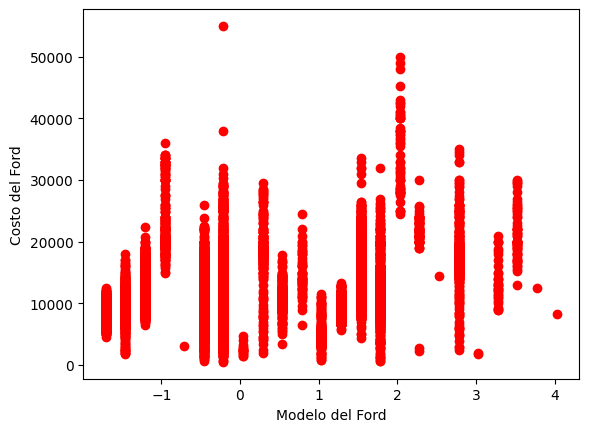

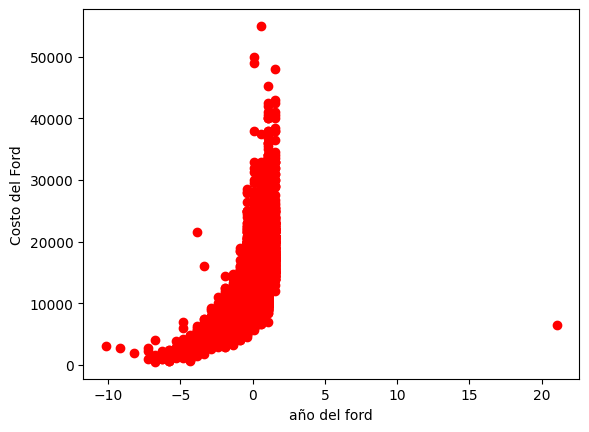

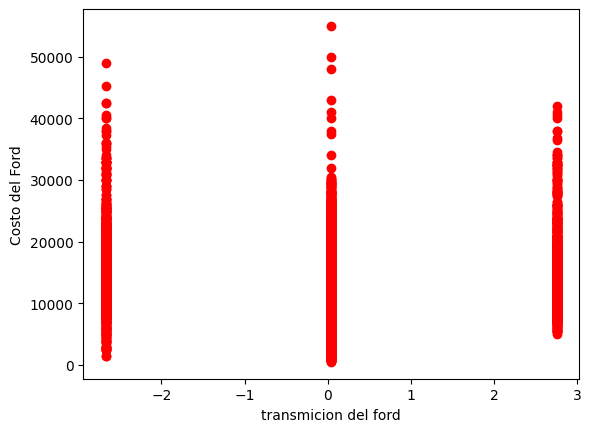

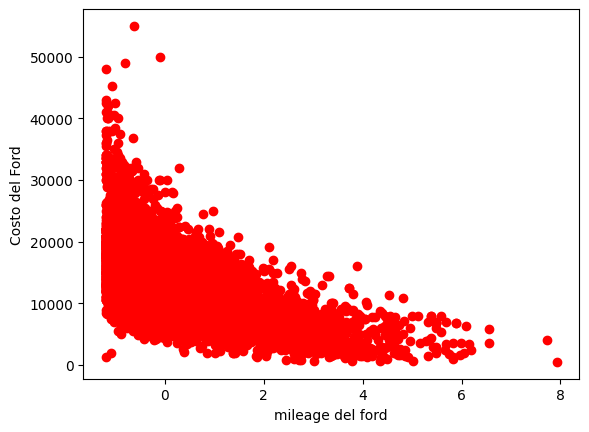

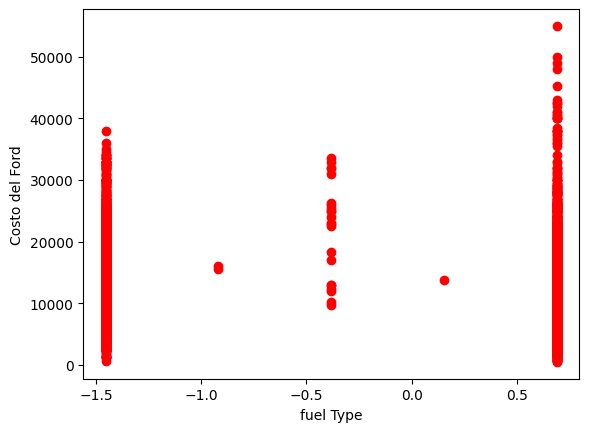

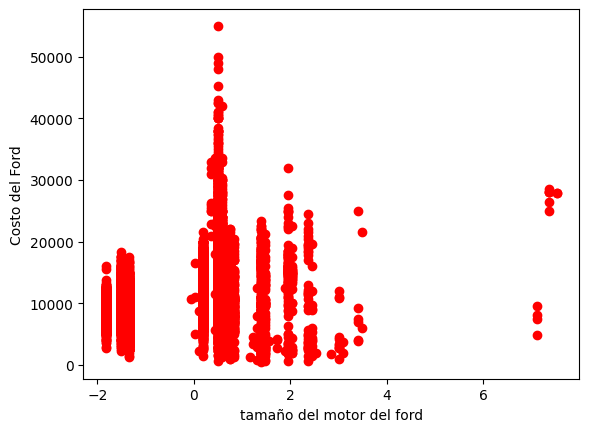

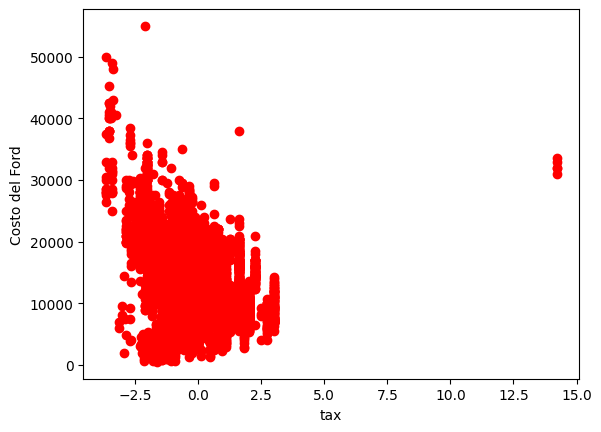

In [208]:
import matplotlib.pyplot as plt

def graficarDatos(x, y, xlabel, ylabel):
    fig = plt.figure()
    plt.plot(x, y, 'ro')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Llamada a la función para graficar datos
xlabel = "Modelo del Ford"
xlabel2= "año del ford"
xlabel3="transmicion del ford"
xlabel4="mileage del ford"
xlabel5="fuel Type"
xlabel6="tamaño del motor del ford"
xlabel7 ="tax"
ylabel = "Costo del Ford"
graficarDatos(X_norm.iloc[:, 0], y, xlabel, ylabel)
graficarDatos(X_norm.iloc[:, 1], y, xlabel2, ylabel)
graficarDatos(X_norm.iloc[:, 2], y, xlabel3, ylabel)
graficarDatos(X_norm.iloc[:, 3], y, xlabel4, ylabel)
graficarDatos(X_norm.iloc[:, 4], y, xlabel5, ylabel)
graficarDatos(X_norm.iloc[:, 5], y, xlabel6, ylabel)
graficarDatos(X_norm.iloc[:, 6], y, xlabel7, ylabel)



In [209]:
X_ready = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [210]:
#definiendo la funcion de costo
def computarCostoMulti(X, y, theta):
    # Inicializa algunos valores útiles
    num_de_ej_de_entrenamiento = y.shape[0]  # número de ejemplos de entrenamiento
    # Calcula las predicciones del modelo (hipótesis)
    hipotesis = np.dot(X, theta)

    # Calcula la función de costo
    valor_de_funcion_de_costo = np.sum(np.square(hipotesis - y))

    # Calcula la función de costo
    num_de_ej_de_entrenamiento = (1 / (2 * y.shape[0])) * valor_de_funcion_de_costo
    return num_de_ej_de_entrenamiento

In [211]:
theta=np.array([1, 5, 2017, 0, 15944, 4, 150, 57.7, 1.0])
JJ = computarCostoMulti(X_ready, y, theta)
print(f"con theta:{ theta } se obtiene un costo de: {JJ}")

con theta:[1.0000e+00 5.0000e+00 2.0170e+03 0.0000e+00 1.5944e+04 4.0000e+00
 1.5000e+02 5.7700e+01 1.0000e+00] se obtiene un costo de: 226407888.72001418


In [212]:
# funcion para realizar una normalizacion de los datos
def NormalizarCaracteistica(x):
  #copia de los datos de entrada
  x_norm=x.copy()
  #inicializa vectores mu y sigma con cero
  mu=np.mean(x.shape[1])
  sigma=np.zeros(x.shape[1])


  #calcula la medida y la desviacion estandar de cada caracteristica
  mu=np.mean(x,axis=0)
  sigma=np.std(x,axis=0)


  #realizamos la normalizacion de caracteristicas
  x_norm=(x-mu)/sigma

  return x_norm,mu,sigma


In [213]:
# se llama a NormalizarCaracteristica con los datos cargados
x_norm,mu,sigma= NormalizarCaracteistica(X)

print(X)
print("media calculada: ", mu)
print("desviacion estandar calculada :", sigma)
print(x_norm)

       model  year  transmission  mileage  fuelType  tax   mpg  engineSize
0          5  2017             0    15944         4  150  57.7         1.0
1          6  2018             1     9083         4  150  57.7         1.0
2          6  2017             1    12456         4  150  57.7         1.0
3          5  2019             1    10460         4  145  40.3         1.5
4          5  2019             0     1482         4  145  48.7         1.0
...      ...   ...           ...      ...       ...  ...   ...         ...
17961      0  2017             1    16700         4  150  47.1         1.4
17962      0  2014             1    40700         4   30  57.7         1.0
17963      6  2015             1     7010         0   20  67.3         1.6
17964     11  2018             1     5007         4  145  57.7         1.2
17965     23  2015             1     5007         4   22  57.7         1.0

[17966 rows x 8 columns]
media calculada:  model               6.848547
year             2016.86647

In [214]:
# añade el termino de interseccion a x
# columna de unos para Xo
X=np.concatenate([np.ones((m,1)),x_norm], axis=1)

In [215]:
print(X)

[[ 1.         -0.46069913  0.06512772 ...  0.59135805 -0.02044162
  -0.81138621]
 [ 1.         -0.21147687  0.55286624 ...  0.59135805 -0.02044162
  -0.81138621]
 [ 1.         -0.21147687  0.06512772 ...  0.59135805 -0.02044162
  -0.81138621]
 ...
 [ 1.         -0.21147687 -0.91034931 ... -1.50505332  0.92766777
   0.57636151]
 [ 1.          1.03463446  0.55286624 ...  0.51072684 -0.02044162
  -0.34880364]
 [ 1.          4.02530164 -0.91034931 ... -1.47280084 -0.02044162
  -0.81138621]]


In [216]:
# #definiendo la funcion de costo
# def computarCostoMulti(X, y, theta):
#     # Inicializa algunos valores útiles
#     num_de_ej_de_entrenamiento = y.shape[0]  # número de ejemplos de entrenamiento
#     # Calcula las predicciones del modelo (hipótesis)
#     hipotesis = np.dot(X, theta)

#     # Calcula la función de costo
#     valor_de_funcion_de_costo = np.sum(np.square(hipotesis - y))

#     # Calcula la función de costo
#     num_de_ej_de_entrenamiento = (1 / (2 * y.shape[0])) * valor_de_funcion_de_costo
#     return num_de_ej_de_entrenamiento



# REGULARIZACION DE LA FUNCION DECENSO POR EL GRADIENTE

In [217]:
def gradientDescentMulti(X, y, theta, alpha, num_iters, lambda_reg):
    m = y.shape[0]  # número de ejemplos de entrenamiento
    J_historia = []  # para almacenar el historial de los valores de la función de costo J

    for _ in range(num_iters):
        # Calcula las predicciones del modelo (hipótesis)
        hipotesis = np.dot(X, theta)

        # Calcula el error de predicción
        error = hipotesis - y

        # Actualiza los parámetros theta
        for j in range(len(theta)):
            if j == 0:
                # No regularizar el término de bias (theta0)
                theta[j] = theta[j] - (alpha / m) * np.sum(error * X[:, j])
            else:
                # Regularizar los demás términos con L2
                theta[j] = theta[j] - (alpha / m) * (np.sum(error * X[:, j]) + (lambda_reg * theta[j]))

        # Calcula la función de costo para el nuevo theta
        costo = computarCostoMulti(X, y, theta, lambda_reg)
        J_historia.append(costo)

    return theta, J_historia


In [218]:
# Función para computar el costo con regularización L2
def computarCostoMultiReg(X, y, theta, lambda_reg):
    # Inicializa algunos valores útiles
    num_de_ej_de_entrenamiento = y.shape[0]  # número de ejemplos de entrenamiento

    # Calcula las predicciones del modelo (hipótesis)
    hipotesis = np.dot(X, theta)

    # Calcula la función de costo
    valor_de_funcion_de_costo = np.sum(np.square(hipotesis - y))

    # Regularización L2
    regularizacion = (lambda_reg / (2 * num_de_ej_de_entrenamiento)) * np.sum(np.square(theta[1:]))

    # Coste final con regularización
    costo = (1 / (2 * num_de_ej_de_entrenamiento)) * valor_de_funcion_de_costo + regularizacion

    return costo


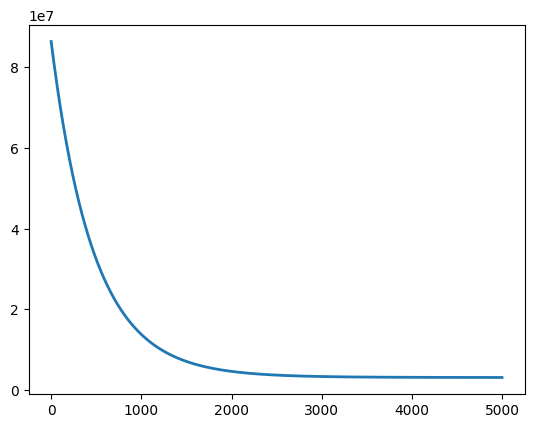

In [224]:


# Ajusta el tamaño de theta para 9 características
theta = np.zeros(9)

# Elegir algun valor para alpha y lambda_reg
alpha = 0.001     # Tasa de aprendizaje
lambda_reg = 0.1  # Parámetro de regularización

# Calcula el costo inicial
JJ = computarCostoMultiReg(X, y, theta, lambda_reg)

# Entrena el modelo con la función modificada
theta, list_historia_fun_de_costo = gradientDescentMultiReg(X, y, theta, alpha, num_iters, lambda_reg)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(list_historia_fun_de_costo)), list_historia_fun_de_costo, lw=2)
# pyplot.title("lineal multivariable")
# pyplot.xlabel('Número de iteraciones')
# pyplot.ylabel('Costo J')



In [219]:
theta=np.array([1, 5, 2017, 0, 15944, 4, 150, 57.7, 1.0])
JJ = computarCostoMulti(X, y, theta)
print(f"con theta:{ theta } se obtiene un costo de: {JJ}")

con theta:[1.0000e+00 5.0000e+00 2.0170e+03 0.0000e+00 1.5944e+04 4.0000e+00
 1.5000e+02 5.7700e+01 1.0000e+00] se obtiene un costo de: 226407888.72001418


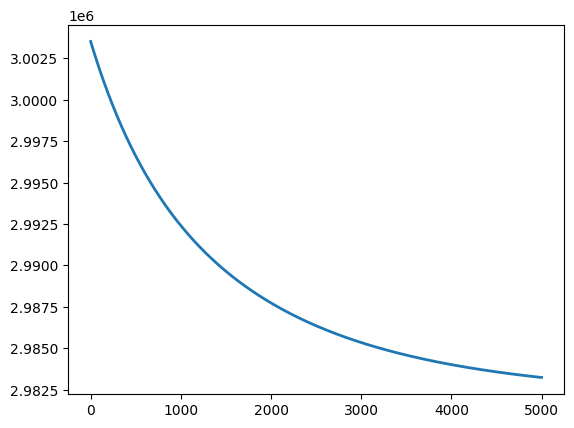

In [223]:
# Elegir algun valor para alpha y lambda_reg
alpha = 0.001     # Tasa de aprendizaje
lambda_reg = 0.1  # Parámetro de regularización

# Calcula el costo inicial
JJ = computarCostoMultiReg(X, y, theta, lambda_reg)

# Entrena el modelo con la función modificada
theta, list_historia_fun_de_costo = gradientDescentMultiReg(X, y, theta, alpha, num_iters, lambda_reg)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(list_historia_fun_de_costo)), list_historia_fun_de_costo, lw=2)


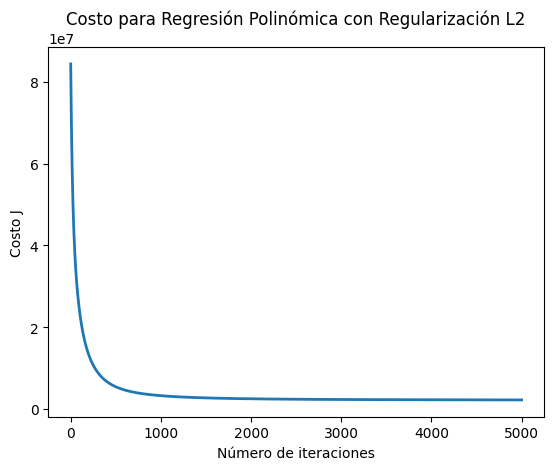

In [226]:
# Para regresión polinómica
poly = PolynomialFeatures(degree=2)  # Puedes ajustar el grado según sea necesario
X_poly = poly.fit_transform(X)  # Transforma las características originales en características polinómicas

# Ajusta el tamaño de theta para las características polinómicas
theta_poly = np.zeros(X_poly.shape[1])

# Elegir algun valor para alpha y lambda_reg
alpha = 0.001     # Tasa de aprendizaje
lambda_reg = 0.1  # Parámetro de regularización

# Entrena el modelo de regresión lineal con regularización L2
theta_poly, list_costo_poly = gradientDescentMultiReg(X_poly, y, theta_poly, alpha, num_iters, lambda_reg)

# Grafica el costo para la regresión polinómica
pyplot.figure()
pyplot.plot(np.arange(len(list_costo_poly)), list_costo_poly, lw=2)
pyplot.title('Costo para Regresión Polinómica con Regularización L2')
pyplot.xlabel('Número de iteraciones')
pyplot.ylabel('Costo J')
pyplot.show()

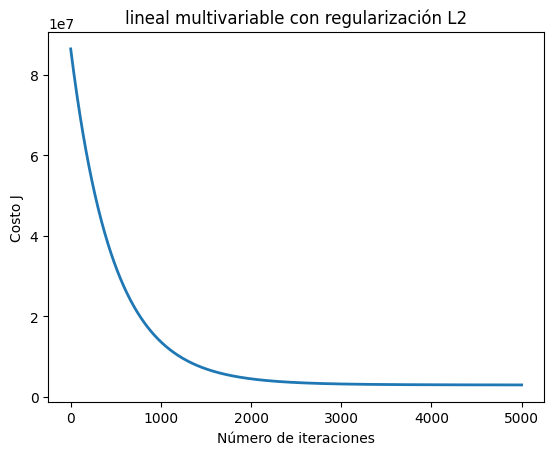

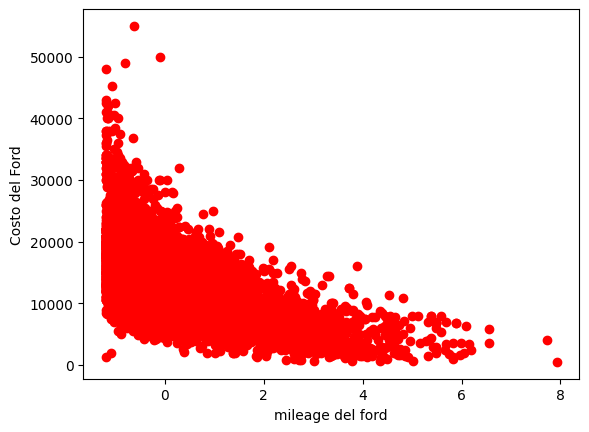

Theta calculado por el descenso por el gradiente: [12197.00271509   208.46857861  2187.9016836    -92.00425589
 -1364.49155375  -734.48997336   205.25106394 -1037.69017574
  1608.43713532]
El valor predecido  0  es (usando el descenso por el gradiente): 11340.6028
El valor predecido  1  es (usando el descenso por el gradiente): 26792.3681
El valor predecido  2  es (usando el descenso por el gradiente): 38848.6143
El valor predecido  3  es (usando el descenso por el gradiente): 61191.0103
El valor predecido  4  es (usando el descenso por el gradiente): 78933.9885
El valor predecido  5  es (usando el descenso por el gradiente): 89393.5994
El valor predecido  6  es (usando el descenso por el gradiente): 1038137.3212
El valor predecido  7  es (usando el descenso por el gradiente): 1097835.5997
El valor predecido  8  es (usando el descenso por el gradiente): 1222093.4096
El valor predecido  9  es (usando el descenso por el gradiente): 139693.4690
El valor predecido  10  es (usando el descen

In [230]:
# Elegir algun valor para alpha y lambda_reg
alpha = 0.001     # Tasa de aprendizaje
lambda_reg = 0.1  # Parámetro de regularización

# Inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(9)  # Ajusta el tamaño de theta para 9 características
theta, list_historia_fun_de_costo = gradientDescentMultiReg(X, y, theta, alpha, num_iters, lambda_reg)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(list_historia_fun_de_costo)), list_historia_fun_de_costo, lw=2)
pyplot.title("lineal multivariable con regularización L2")
pyplot.xlabel('Número de iteraciones')
pyplot.ylabel('Costo J')
graficarDatos(X_norm.iloc[:, 3], y, xlabel4, ylabel)

# Muestra los resultados del descenso por el gradiente
print('Theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# Estimar el precio para un ford con distintas características      (preciciones)
X_predicciones = [
    [1, 5, 2017, 0, 15944, 4, 150, 57.7, 1.0],
    [2,5, 2014, 1, 9200, 0, 155, 48.7,2],
    [3, 6, 2018, 1, 10460, 4, 150, 57.7, 1.5],
    [5, 5, 2017, 0, 12456, 4, 20, 67.3, 1.6],
    [6, 8, 2019, 0, 13500, 4.5, 165, 52.1, 2],
    [7, 5, 2016, 1, 9800, 0, 140, 45.6, 1.8],
    [85, 0, 2014, 1, 11800, 4, 160, 49.9, 2.3],
    [90, 23, 2015, 0, 10000, 4, 150, 55.2, 1.4],
    [100, 11, 2013, 1, 8800, 4, 135, 43.8, 2.5],
    [11, 4, 2018, 1, 11000, 0, 155, 47.2, 1.7],
    [12, 6, 2017, 0, 9500, 4, 145, 44.5, 2.1],
    [13, 11, 2016, 1, 10200, 4, 150, 48.8, 1.9]]# Ajusta el tamaño de X_array para 9 características

for i, x_prediccion in enumerate(X_predicciones):
  x_prediccion[1:9]=(x_prediccion[1:9] -mu)/sigma
  price=np.dot(x_prediccion, theta)
  print('El valor predecido ',i,' es (usando el descenso por el gradiente): {:.4f}'.format(price))

